<a href="https://colab.research.google.com/github/JangAyeon/TIL/blob/main/Kaggle_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #linear algebra
import pandas as pd #data preprocessing, CSV file

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
#matplotlib의 기본 scheme말고 seaborn scheme 세팅
sns.set(font_scale=2.5)
#매번 graph의 font size 지정 X, seaborn의 font scale 사용하면 편리함

import missingno as msno

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Overall Process
1. 데이터셋 확인<br>
대부분의 캐글 데이터는 잘 정제됨. 가끔 존재하는 null data 확인/수정 필요
2. 탐색적 데이터 분석 (EDA)<br>
여러 feature 개별적 분석, feature의 상관관계 확인, 여러 시각화를 통한 insight 도출
3. Feature Engineering<br>
model 세우기 전에 model 성능을 높일 수 있도로고 feature engineering 진행. one-hot encoding, class 나누기, 구간 나누기, 텍스트 데이터 처리 진행 등
4. model 만들기<br>
sklearn 사용해 모델 만들기. 파이썬에서 머신러닝을 할 때 sklearn 사용하면 수많은 알고리즘을 일관된 문법으로 사용 가능. 딥러닝에서는 tensorflow, pytorch 등 사용 가능.
5. model 학습 및 예측<br>
trainset을 가지고 모델 학습 시킨 후, testset을 가지고 prediction 진행
6. model 평가<br>
예측 성능이 원하는 수준인지 판단. 풀려는 문제에 따라 모델 평가 방식이 달라짐. 학습된 모델이 어떤 것을 학습했는지 확인

# 1. Load Data
* 파이썬에서 table화된 data를 다루는 데 가장 최적화된 라이브러리 pandas 사용
* pandas를 사용해 dataset의 간단한 통계적 분석부터 복잡한 처리를 간단한 method 사용해 진행
* 파이썬으로 데이터 분석시 반드시 능숙하게 사용해야할 라이브러리로 반복적인 커널 공부로 사용법에 익히기
* 캐글 데이터 셋은 보통 train, test set으로 나눠져 있음

In [2]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

feature : `Pclass`, `Age`, `SipSp`, `Parch`, `Fare` 등<br>
target label: `Survived`

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


pandas dataframe의 `describe()`로 각 feature가 가진 통계치 반환

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null Data check




* train/test set의 Age 약 20%, Cabin 약 80%
* train set의 Embarked 약 0.22%

In [6]:
for col in df_train.columns:
  msg="column : {:>10}\t Percentage of NaN value : {:.2f}%".format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

column : PassengerId	 Percentage of NaN value : 0.00%
column :   Survived	 Percentage of NaN value : 0.00%
column :     Pclass	 Percentage of NaN value : 0.00%
column :       Name	 Percentage of NaN value : 0.00%
column :        Sex	 Percentage of NaN value : 0.00%
column :        Age	 Percentage of NaN value : 19.87%
column :      SibSp	 Percentage of NaN value : 0.00%
column :      Parch	 Percentage of NaN value : 0.00%
column :     Ticket	 Percentage of NaN value : 0.00%
column :       Fare	 Percentage of NaN value : 0.00%
column :      Cabin	 Percentage of NaN value : 77.10%
column :   Embarked	 Percentage of NaN value : 0.22%


In [7]:
for col in df_test.columns:
  msg="column : {:>10}\t Percentage of NaN value : {:.2f}%".format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
  print(msg)

column : PassengerId	 Percentage of NaN value : 0.00%
column :     Pclass	 Percentage of NaN value : 0.00%
column :       Name	 Percentage of NaN value : 0.00%
column :        Sex	 Percentage of NaN value : 0.00%
column :        Age	 Percentage of NaN value : 20.57%
column :      SibSp	 Percentage of NaN value : 0.00%
column :      Parch	 Percentage of NaN value : 0.00%
column :     Ticket	 Percentage of NaN value : 0.00%
column :       Fare	 Percentage of NaN value : 0.24%
column :      Cabin	 Percentage of NaN value : 78.23%
column :   Embarked	 Percentage of NaN value : 0.00%


MSNO 라이브러리 사용해 null data 존재 쉽게 파악

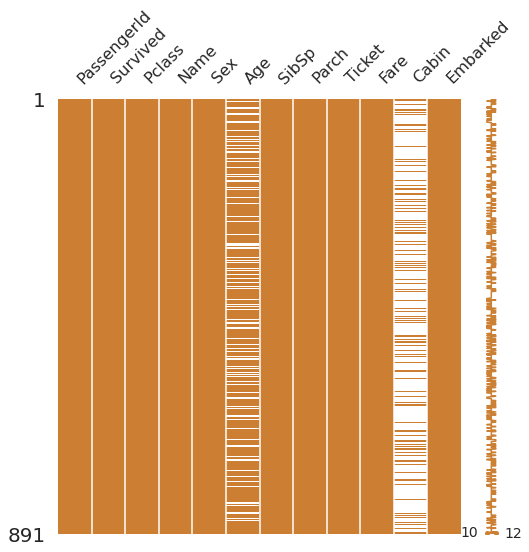

In [8]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

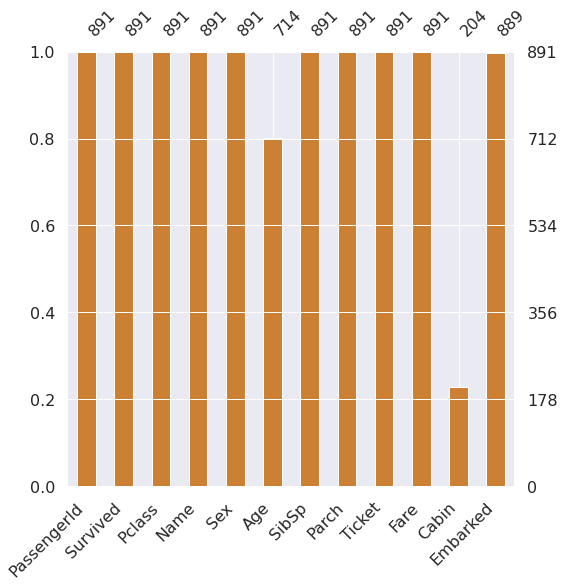

In [9]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

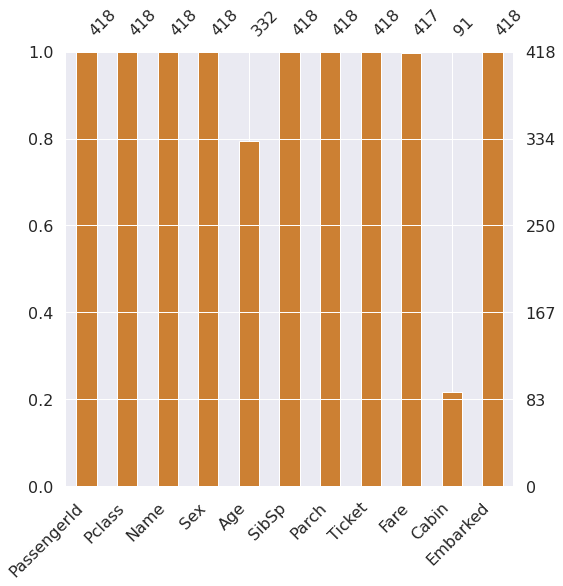

In [10]:
msno.bar(df=df_test.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

## 1.2 Target label
* target label이 어떤 distribution을 가지고 있는지 확인
* binary classification 문제의 경우, 1과 0의 분포에 따라 모델의 평가 방법이 달라짐

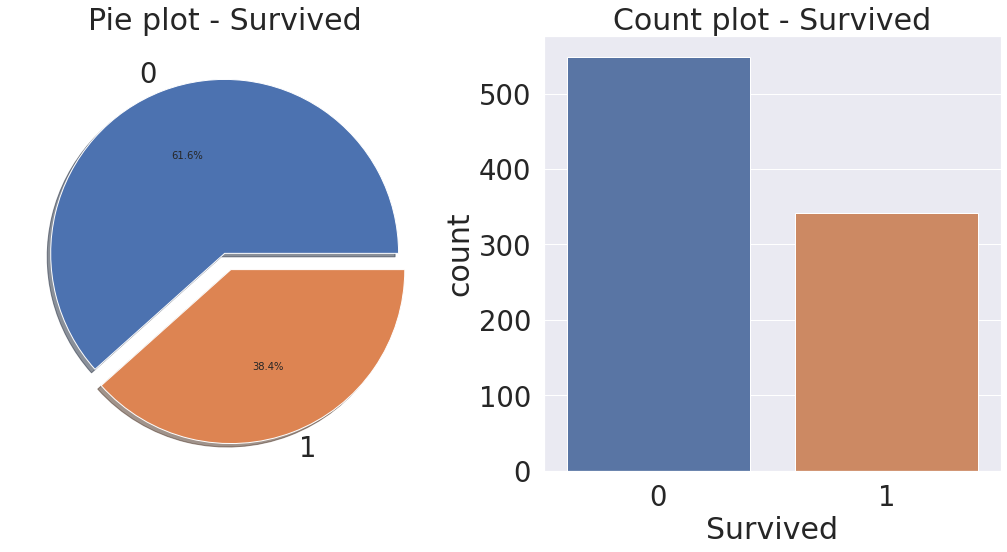

In [11]:
f,ax = plt.subplots(1,2, figsize=(18,8))
df_train["Survived"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",ax=ax[0],shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel("")
sns.countplot("Survived",data=df_train,ax=ax[1])
ax[1].set_title("Count plot - Survived")
plt.show()

* 죽은 사람 많음
* 38.4% 생존
* target label의 분포가 균일 (balanced)함


# 2. Exploratory data analysis 
* 본격적인 데이터 분석 진행
* 데이터 안의 숨겨진 사실 찾기 위해 적절한 시각화 요구됨
* 시각화, 라이브러리는 matplotlib, seaborn, plotly 등 존재

## 2.1 Pclass
* ordinal, 서수형 데이터임
* 카테고리이면서 순서가 있음
* Pclass에 따른 생존률의 차이를 살펴봄. pandas dataframe에서 groupby와 pivot 기능을 사용
* Pclass와 Survived를 가져와, pclass로 묶어 pclass마다 0,1이 count가 되고 이를 평균내면 각 Pclass마다 생존별 나옴
* count()를 하면, 각 class에 몇명이 있는지 확인 가능.
* sum()을 하면, 전체중 생존한 사람(survived=1)사람의 총합 확인 가능

In [12]:
df_train[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
pd.crosstab(df_train["Pclass"],df_train["Survived"],margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


grouped 객체에 mean()을 하면 각 클래스별 생존율을 구할 수 있음
* class 1인 경우<br>
80/(80+136)=0.62

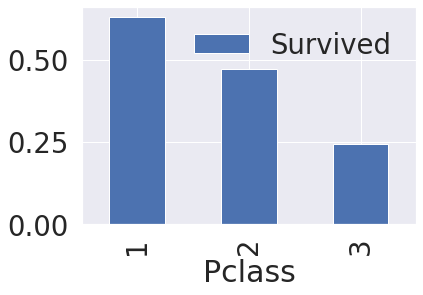

In [15]:
df_train[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean().sort_values(by="Survived",ascending=False).plot.bar()

* Pclass가 좋을 수록 생존률 높음
* seaborn 이용해, 특정 label에 따른 갯수 확인 가능

## 2.2 Sex
* 성별로 생존률이 어떻게 달라지는지 확인
* pandas groupby와 seaborn counterplot 사용해 시각화

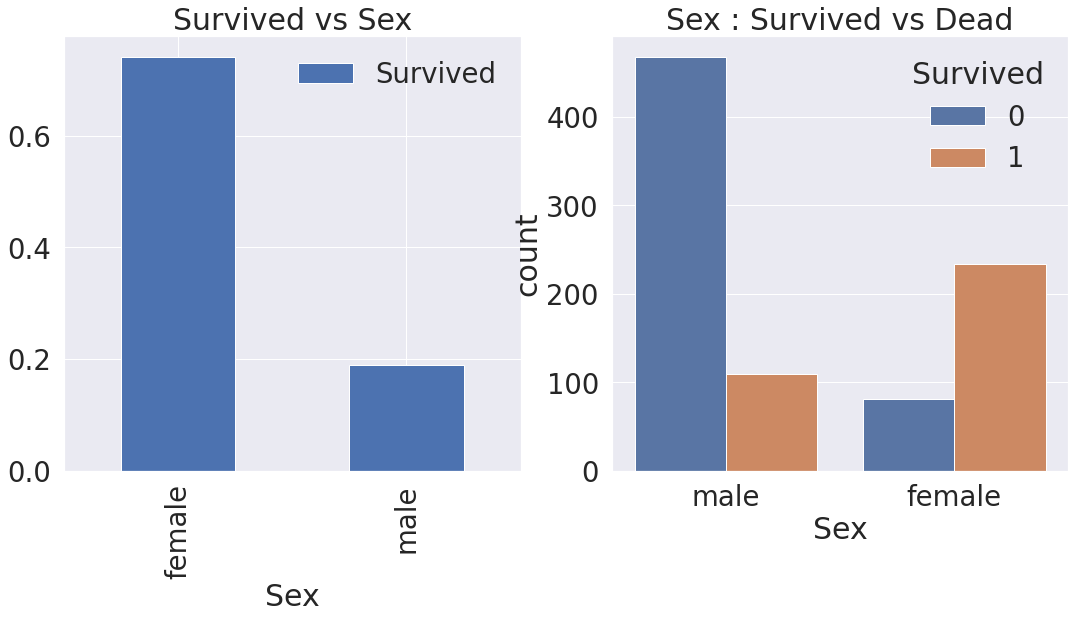

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[["Sex","Survived"]].groupby(["Sex"],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot("Sex",hue="Survived",data=df_train,ax=ax[1])
ax[1].set_title("Sex : Survived vs Dead")
plt.show()

* 여자가 생존할 확률 높음

In [17]:
df_train[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
pd.crosstab(df_train["Sex"],df_train["Survived"],margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


* Sex 또한 예측 모델에 쓰일 중요한 feature

## 2.3 Sex & Pclass
* Sex, Pclass 두가지에 관해 생존이 어떻게 달라지는지 확인
* seaborn의 factorplot을 이용해 쉽게 3차원 그래프 그릴 수 있음

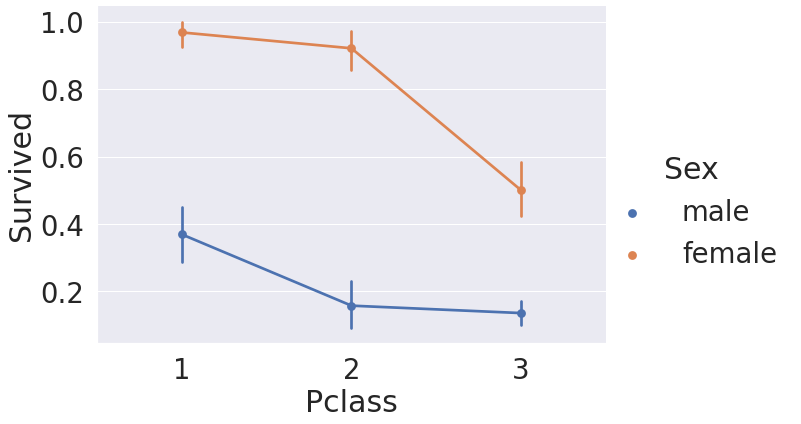

In [19]:
sns.factorplot("Pclass","Survived",hue="Sex",data=df_train,size=6,aspect=1.5)

* 모든 클래스에 대해서 female이 male보다 생존률 높음
* 남자, 여자 상관없이 클래스가 높을 수록 생존률이 높아짐
* hue 대신 column 사용해보자...

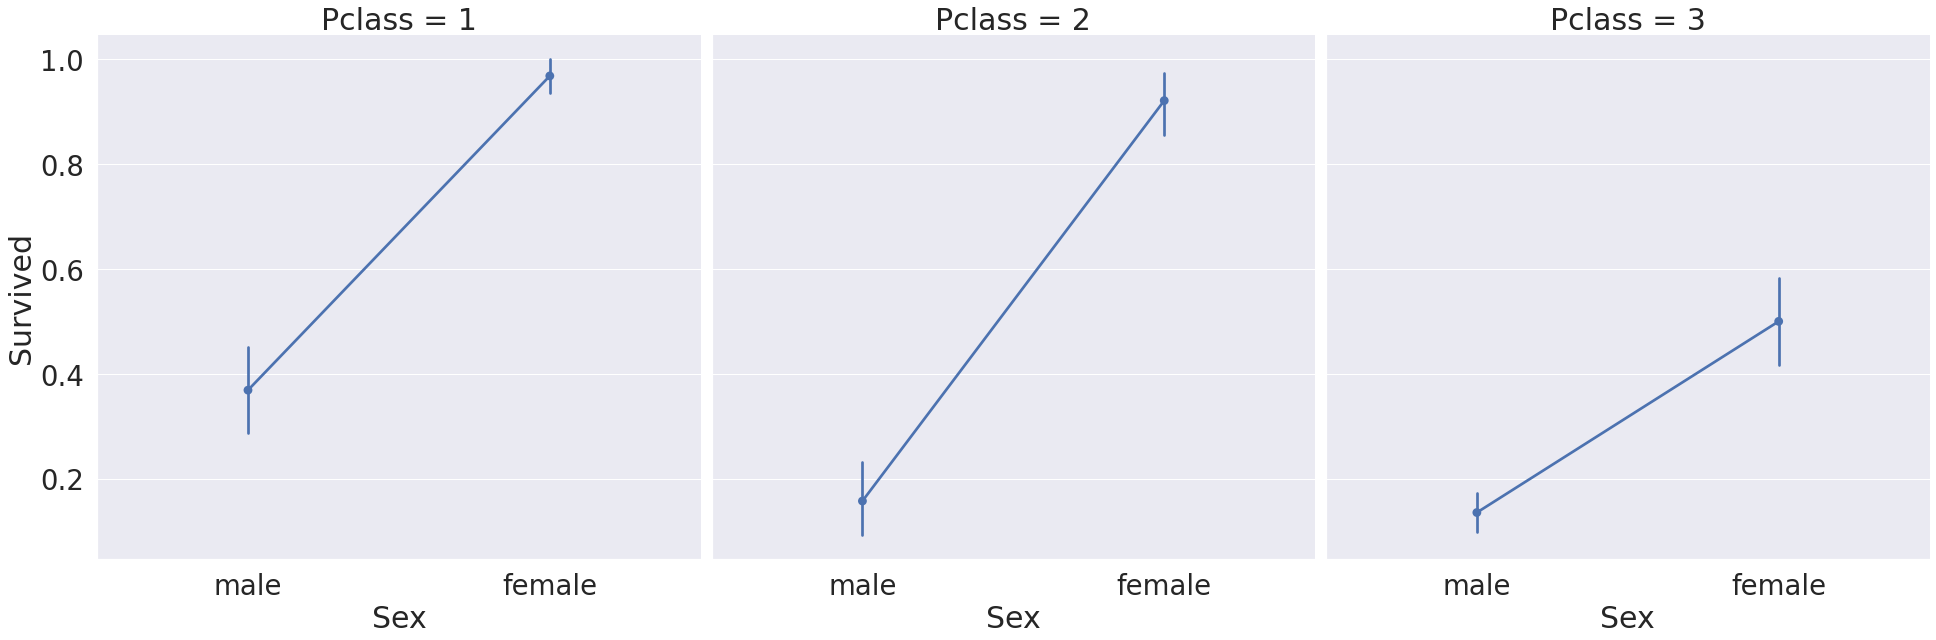

In [20]:
sns.factorplot(x="Sex",y="Survived",col="Pclass",data=df_train,satureation=.5,size=9,aspect=1)

## 2.4 Age

In [21]:
print("제일 나이가 많은 탑승객 : {:.1f} Years".format(df_train["Age"].max()))
print("제일 나이가 적은 탑승객 : {:.1f} Years".format(df_train["Age"].min()))
print("탑승객 평균 나이 : {:.1f} Years".format(df_train["Age"].mean()))

제일 나이가 많은 탑승객 : 80.0 Years
제일 나이가 적은 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


생존에 따른 Age의 histogram 그려보자

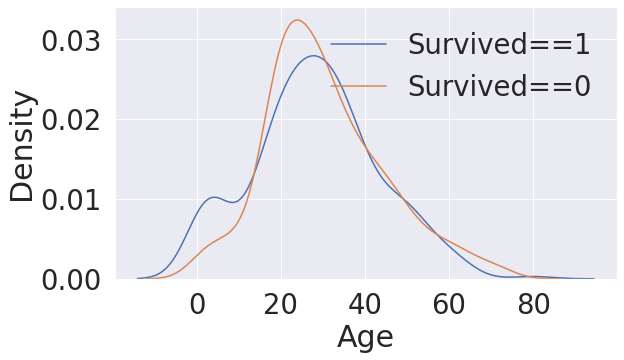

In [22]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train["Survived"]==1]["Age"],ax=ax)
sns.kdeplot(df_train[df_train["Survived"]==0]["Age"],ax=ax)
plt.legend(["Survived==1","Survived==0"])
plt.show()

* 생존자 중 나이가 어린 경우가 많음

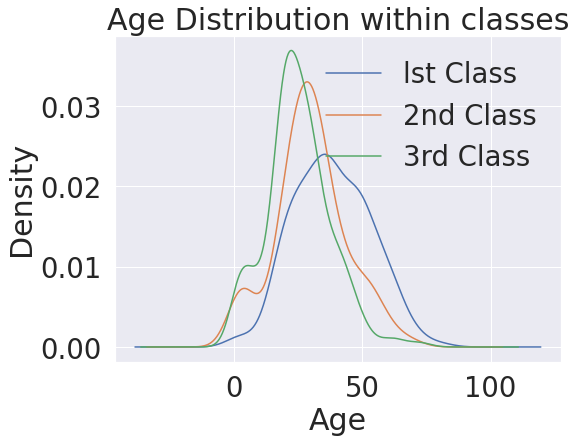

In [23]:
#Age distribution withing classes
plt.figure(figsize=(8,6))
df_train["Age"][df_train["Pclass"]==1].plot(kind="kde")
df_train["Age"][df_train["Pclass"]==2].plot(kind="kde")
df_train["Age"][df_train["Pclass"]==3].plot(kind="kde")

plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(["lst Class","2nd Class","3rd Class"])

* Pclass 가 높을 수록 나이 많은 사람의 비중이 커짐
* 나이대가 변하면서 생존률의 변화 알라보고자 함 
* 나이 범위를 축적하면서 생존률을 살펴보자

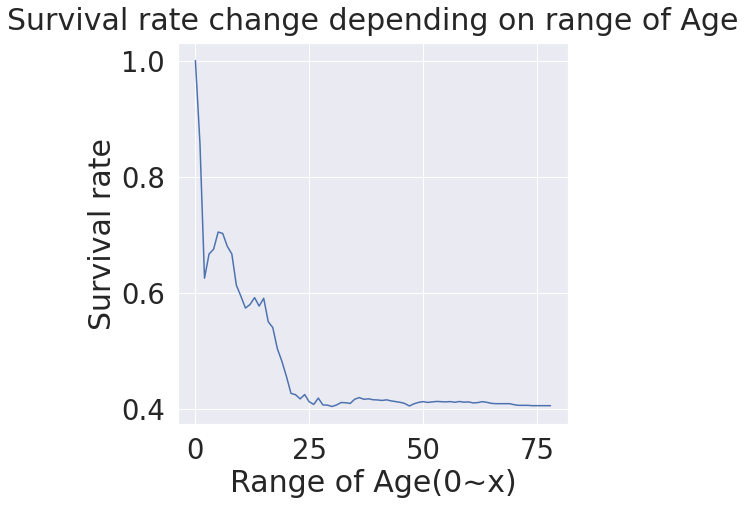

In [24]:
cummulate_survival_ratio=[]
for i in range(1,80):
  cummulate_survival_ratio.append(df_train[df_train["Age"]<i]["Survived"].sum()/len(df_train[df_train["Age"]<i]["Survived"]))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title("Survival rate change depending on range of Age",y=1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0~x)")
plt.show()

* 나이가 어릴 수록 생존률이 높음

## 2.5 Pclass & Sex & Age
* 지금까지 살펴본 Sex, Pclass, Age, Survived 모두에 대해서 살펴보기
* seaborn의 violinplot 사용
* x축 : case로 Pclass, Sex
* y축 : distribution으로 Age

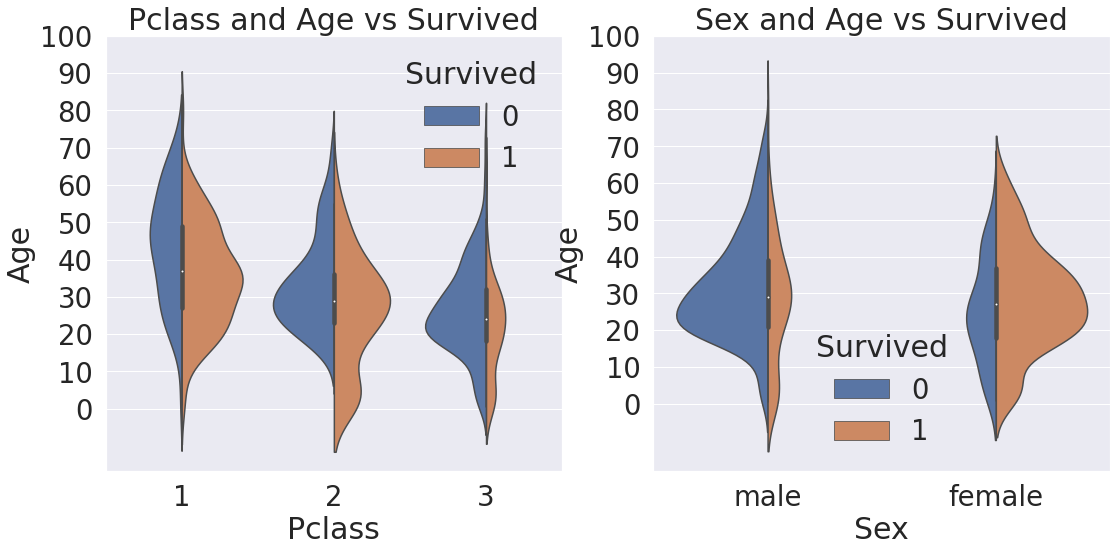

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=df_train,scale="count",split=True,ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=df_train,scale="count",split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

* 왼쪽은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부를 따라 구분한 그래프
* 오른쪽은 Sex 별로 Age의 distribution이 어떻게 다른지, 거기에 생존 여부를 따라 구분한 그래프
* 생존만 봤을 때, 모든 클래스에서 나이가 어릴수록 많이 생존 함
* 오른쪽에 따르면 명확히 여자가 많이 생존함
* 여성과 아이를 먼저 챙긴 것이라고 추측 가능

## 2.6 Embarked
* 탑승한 항구
* 탑승한 항구에 따른 생존률 관찰

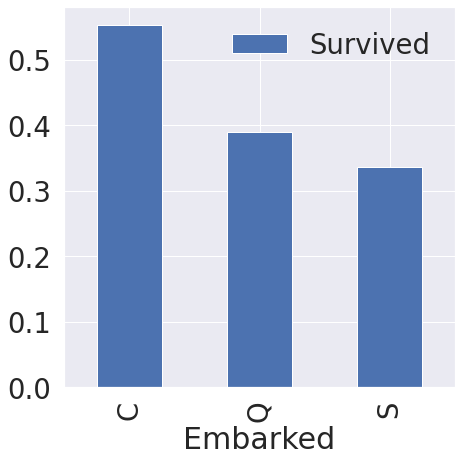

In [26]:
f,ax=plt.subplots(1,1,figsize=(7,7))
df_train[["Embarked","Survived"]].groupby(["Embarked"],as_index=True).mean().sort_values(by="Survived",ascending=False).plot.bar(ax=ax)

* 약간의 차이는 있지만 비슷한 생존률 지님
* C가 제일 높음
* 모델에 큰 영향을 미칠지는 미지수이지만 일단 사용하겠음
* 모델 만들고 사용한 feature들이 얼마나 중요한 역할하는지 확인 가능
* 다른 feature로 split해 관찰 진행

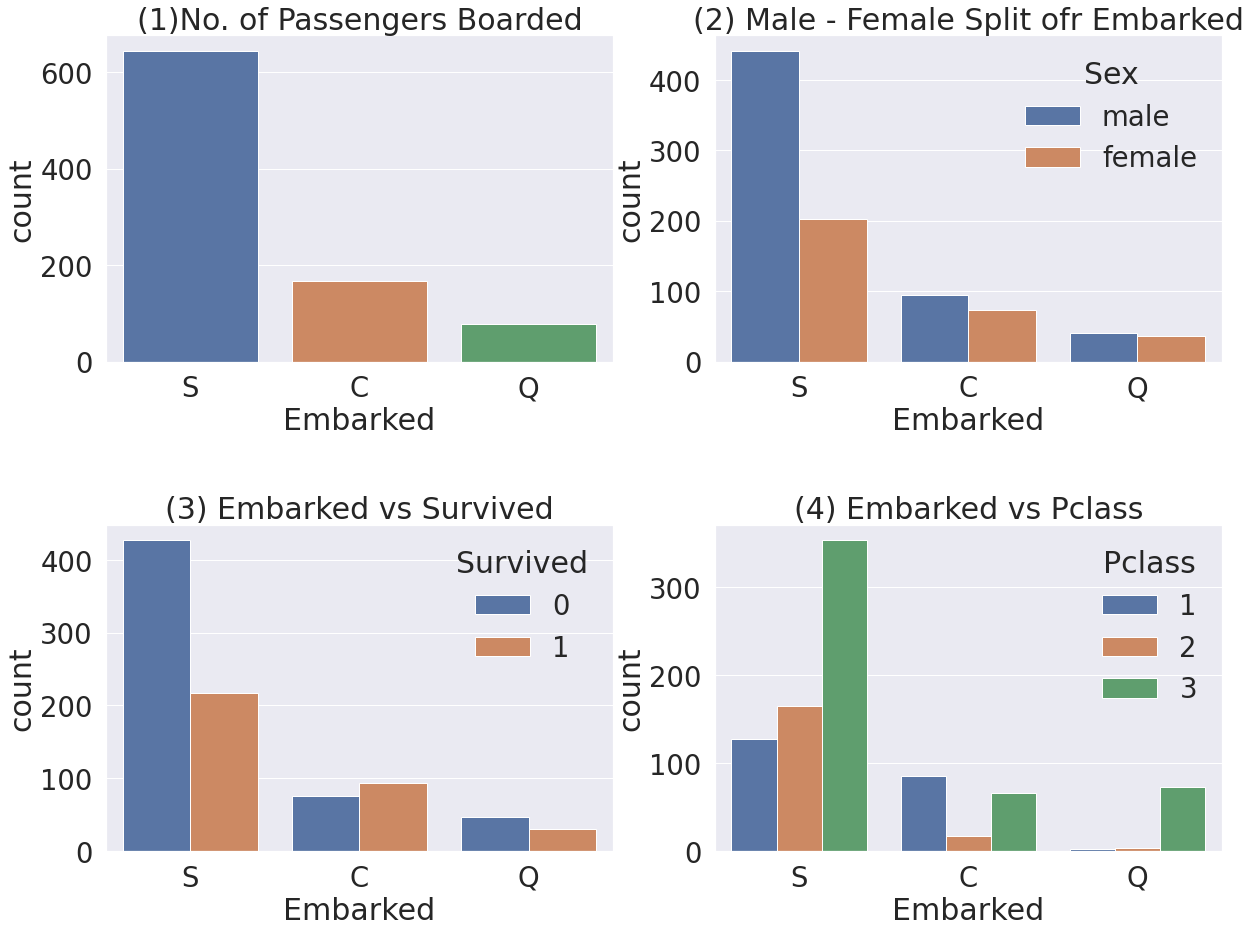

In [27]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot("Embarked",data=df_train,ax=ax[0,0])
ax[0,0].set_title("(1)No. of Passengers Boarded")

sns.countplot("Embarked",hue="Sex",data=df_train,ax=ax[0,1])
ax[0,1].set_title("(2) Male - Female Split ofr Embarked")

sns.countplot("Embarked",hue="Survived",data=df_train,ax=ax[1,0])
ax[1,0].set_title("(3) Embarked vs Survived")

sns.countplot("Embarked",hue="Pclass",data=df_train,ax=ax[1,1])
ax[1,1].set_title("(4) Embarked vs Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 1 : 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승함
* 2 : C와 Q는 남여 비율이 비슷하고, S는 남자가 더 많음
* 3 : 생존 확률이 S의 경우 많이 낮음
* 4 : class로 split해서 보니, C가 생존확률이 높은 건 클래스가 높은 사람이 많이 타서임.<br> S는 3rd class가 많이 타서 생존 확률이 낮게 나옴

## 2.7 Family - SipSp(형제 자매) + Parch(부모, 자녀)
* Family = SipSp + Parch

In [28]:
df_train["FamilySize"]=df_train["SibSp"]+df_train["Parch"]+1 #자기 자신 포함해야 함
df_test["FamilySize"]=df_test["SibSp"]+df_test["Parch"]+1 #자기 자신 포함해야 함

In [29]:
print("Maximum size of Family: ",df_train["FamilySize"].max())
print("Minimun size of Family: ",df_train["FamilySize"].min())

Maximum size of Family:  11
Minimun size of Family:  1


FamilySize와 생존 관계를 살펴보자!

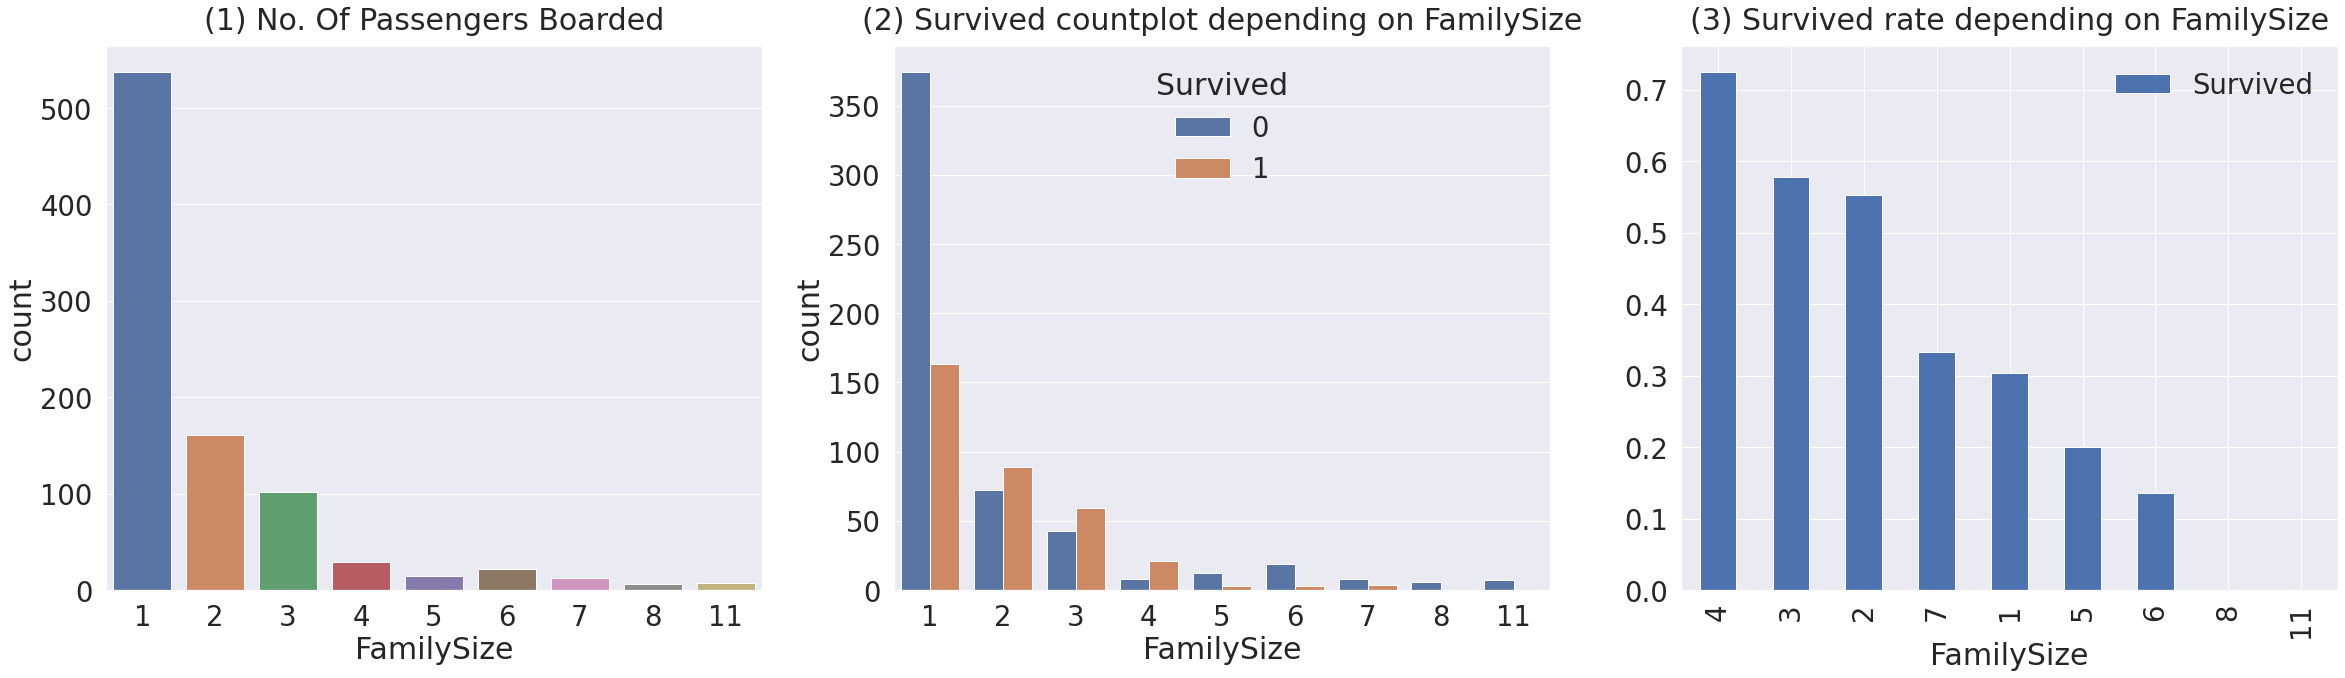

In [30]:
f,ax=plt.subplots(1,3,figsize=(40,10))

sns.countplot("FamilySize",data=df_train,ax=ax[0])
ax[0].set_title("(1) No. Of Passengers Boarded",y=1.02)

sns.countplot("FamilySize",hue="Survived",data=df_train,ax=ax[1])
ax[1].set_title("(2) Survived countplot depending on FamilySize",y=1.02)

df_train[["FamilySize","Survived"]].groupby(["FamilySize"],as_index=True).mean().sort_values(by="Survived",ascending=False).plot.bar(ax=ax[2])
ax[2].set_title("(3) Survived rate depending on FamilySize",y=1.02)

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

* 1: 가족 크기가 1 ~ 11까지 있음. 대부분 1명이고 그다음으로 2,3,4명 순으로 많음
* 2, 3: 가족 크기에 생존 비교로 가족 4명인 경우가 가장 생존확률이 높음. 가족 수가 많아질수록, 생존 확률이 낮아짐. 가족 수가 너무 작아거나 너무 커도, 생존 확률이 작음. 3 ~ 4명 선에서 생존확률이 높음. 

## 2.8 Fare
* 탑승요금으로, continous feature임

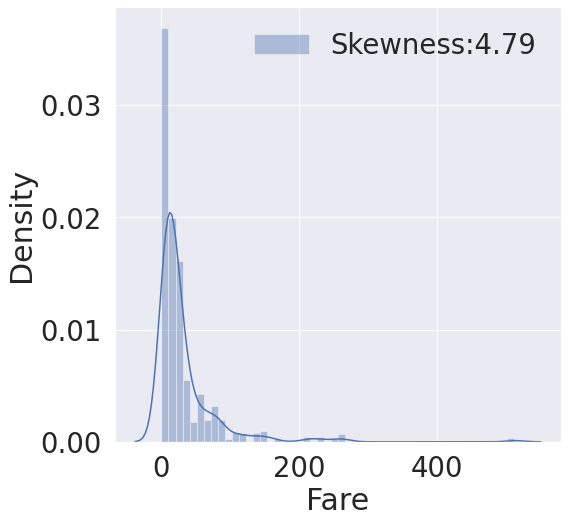

In [31]:
f,ax=plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_train["Fare"],color="b",label="Skewness:{:.2f}".format(df_train["Fare"].skew()),ax=ax)
g=g.legend(loc="best")

* distribution이 매우 비대침 (high skewness)<br>
 -> 이상태로 모델에 넣으면 잘못 학습할 수 있음. 몇개 없는 outlier에 대해서 민감하게 반응하면 실제 예측 시 좋지 못함 결과 부를 수 있음<br>
* outlier 영향을 줄이기 위해 Fare에 log 취할 수 있음
* pandas의 dataFrame의 특정 column에 공통된 함수를 적용하는 map 또는 apply를 사용
* Fare column의 데이터에 모두 log를 취할 것인데 이를 lamda 함수를 이용해 로그 함수를 map에 인수로 넣어주면 해당 Fare columns 데이터에 그대로 적용됨

In [32]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
#testset에 있는 Nan 값을 평균으로 대체

df_train["Fare"]=df_train["Fare"].map(lambda i : np.log(i) if i>0 else 0)
df_test["Fare"]=df_test["Fare"].map(lambda i : np.log(i) if i>0 else 0)

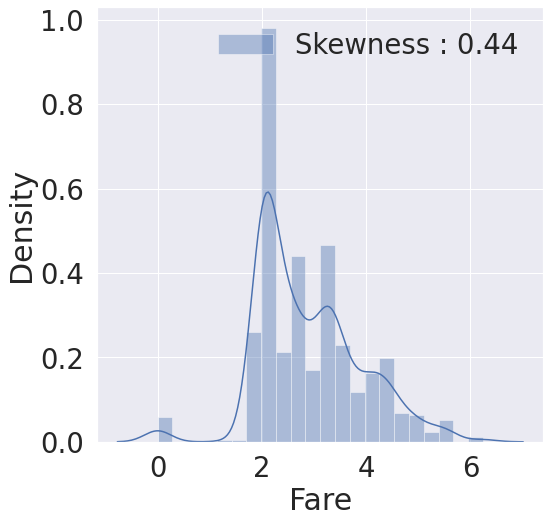

In [33]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_train["Fare"],color="b",label="Skewness : {:.2f}".format(df_train["Fare"].skew()),ax=ax)
g=g.legend(loc="best")

* log 취해, 비대칭성 많이 사라짐<br>
이러한 feature engineering 작업을 사용해 모델이 더 좋은 성능을 내도록 할 수 있음<br>
feature engineering은 그 모델의 성능을 높이기 위해 feature에 여러 조작을 가하거나 새로운 feature를 추가하는 것임

## 2.9 Cabin
* 해당 feature는 Nan이 대략 80%로 생존에 영향을 미치는 중요한 정보를 얻어내기는 어려움<br>
 -> 그러므로 모델에 포함시키지 않을 거임

## 2.10 Ticket
* Nan는 없으나 string data이므로 실제 모델에서 사용하기 위해서는 일련의 작업 필요

In [34]:
df_train["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
3101295     6
           ..
14973       1
PC 17596    1
27042       1
36865       1
65306       1
Name: Ticket, Length: 681, dtype: int64